# USA Estate Analysis
### Ling Wang

# Introduction
#### The U.S. housing market plays a central role in household wealth and the broader economy. Understanding which property characteristics most strongly influence house prices can support better decisions for buyers, sellers, investors, and policymakers.

#### This project applies predictive analytics techniques to a large national real‑estate dataset with the goals to:

#### Explore how prices vary across states and property characteristics.
#### Identify the most influential drivers of housing prices.
#### Build and evaluate predictive models for estimating house prices.
#### The work follows a standard data‑science pipeline: data cleaning and preparation, exploratory data analysis (EDA), model building, evaluation, and interpretation.



<h2><span style="color:red;">Import Libraries and Load Dataset</span></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/2024 2025 SETON HALL/Fall 2025/Predictive Analytics/Group Project/realtor-data.zip.csv")

In [3]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df.shape

(2226382, 12)

In [5]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [6]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


<h2><span style="color:red;">Data Cleaning</span></h2>

In [7]:
df = df[
    (df['price'] > 10000) & (df['price'] < 5_000_000) &
    (df['house_size'] > 300) & (df['house_size'] < 15000) &
    (df['bath'] < 60) & (df['bed'] < 50)]

In [8]:
df = df[df['status'] != 'ready to build'].drop(['prev_sold_date', 'brokered_by', 'street', 'city', 'zip_code'], axis=1)

In [9]:
df = df.drop_duplicates() 

In [10]:
df.isnull().sum()

status             0
price              0
bed                0
bath               0
acre_lot      228344
state              0
house_size         0
dtype: int64

In [11]:
#handling the missing data

df['acre_lot']= df['acre_lot'].fillna(df['acre_lot'].median()) 

In [12]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")
print(df.nunique())

Unique values in status: ['for_sale' 'sold']
Unique values in price: [105000.  80000.  67000. ... 386464. 488512. 280290.]
Unique values in bed: [ 3.  4.  2.  5.  6.  1.  9.  7.  8. 12. 13. 10. 11. 24. 28. 14. 18. 16.
 15. 19. 20. 17. 21. 31. 27. 22. 23. 47. 36. 38. 25. 26. 29. 34. 33. 32.
 37. 42. 43. 41. 30. 35. 48. 44. 40.]
Unique values in bath: [ 2.  1.  3.  5.  4.  7.  6.  8.  9. 10. 11. 13. 16. 12. 15. 18. 14. 25.
 19. 33. 17. 22. 39. 20. 28. 21. 36. 23. 26. 24. 54. 29. 32. 38. 27. 30.]
Unique values in acre_lot: [ 0.12  0.08  0.15 ... 52.43 23.14 30.67]
Unique values in state: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut' 'New Jersey'
 'New York' 'New Hampshire' 'Vermont' 'Rhode Island' 'Wyoming' 'Maine'
 'Georgia' 'Pennsylvania' 'West Virginia' 'Delaware' 'Ohio' 'California'
 'Maryland' 'Virginia' 'Colorado' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'South Carolina' 'Tennessee' 'Mississippi'
 'Alabama' 'Florida' 'Texas' 'Missouri' 'Arkansa

In [13]:
df.shape

(1566422, 7)

<h2><span style="color:red;">(EDA) Exploratory Data Analysis & Visualization</span></h2>

### Distribution of House Prices

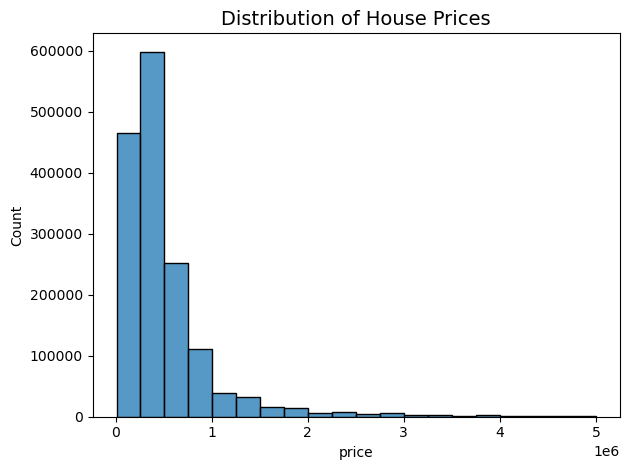

In [14]:
sns.histplot(df['price'], bins=20)
plt.title("Distribution of House Prices",fontsize=14)
plt.tight_layout()
plt.show()

### The price distribution is right‑skewed:
#### Most homes are clustered in the lower and middle price ranges.
#### A smaller number of high‑priced properties extend the right tail.
#### This justified the later use of a log‑transformation of price in modeling.

### Median House Price by State

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36880\896276342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_price, x='state', y='price', palette='viridis')


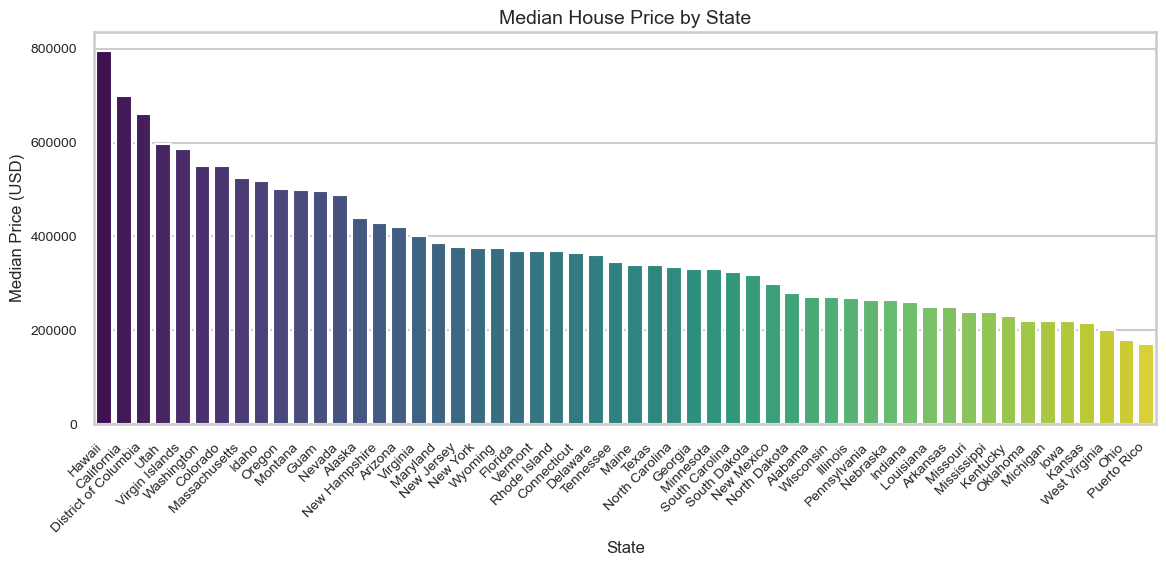

In [15]:
median_price = df.groupby('state')['price'].median().sort_values(ascending=False).reset_index()

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))
sns.barplot(data=median_price, x='state', y='price', palette='viridis')
plt.title('Median House Price by State', fontsize=14)
plt.xlabel('State',fontsize=12)
plt.ylabel('Median Price (USD)',fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.tight_layout()
plt.show()

#### States such as California, Hawaii, Massachusetts, and the District of Columbia show among the highest median prices.
#### Many interior states and parts of the South/Midwest exhibit lower median prices.
#### There are significant geographic disparities: location clearly matters for pricing.

### Median House Price by Number of bedrooms

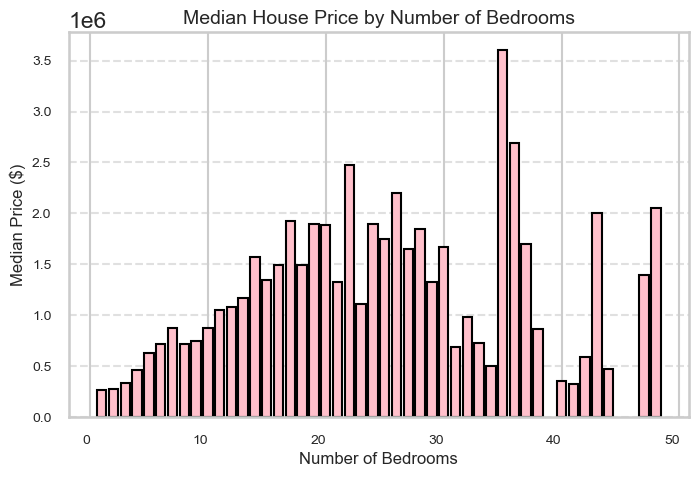

In [16]:
median_price = df.groupby('bed')['price'].median()
# Plot as bar chart
plt.figure(figsize=(8, 5))
plt.bar(median_price.index, median_price.values, color='pink', edgecolor='black')
plt.title("Median House Price by Number of Bedrooms", fontsize=14)
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
plt.show()

#### Median prices generally increase with more bedrooms.
#### The relationship is strong at low to moderate bedroom counts; very high bedroom values are rare and noisy.

### Median House Price by Number of Bathrooms

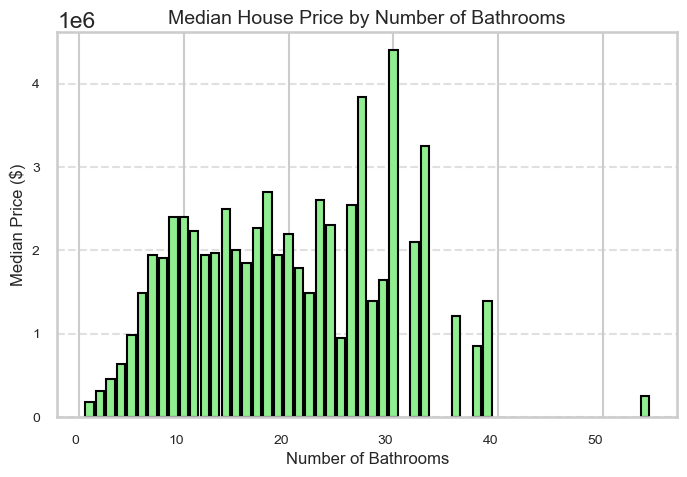

In [17]:
median_price = df.groupby('bath')['price'].median()
# Plot as bar chart
plt.figure(figsize=(8, 5))
plt.bar(median_price.index, median_price.values, color='lightgreen', edgecolor='black')
plt.title("Median House Price by Number of Bathrooms", fontsize=14)
plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Prices rise more steeply with additional bathrooms than with extra bedrooms.
#### This suggests bathrooms are a particularly important driver of perceived value.

### Median House Price by House Size

In [18]:
columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36880\2034724649.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar(range(5,15001,1000),df[columns].groupby([pd.cut(df['house_size'], bins=Bins,right=False)]).median()['price'],width=800)


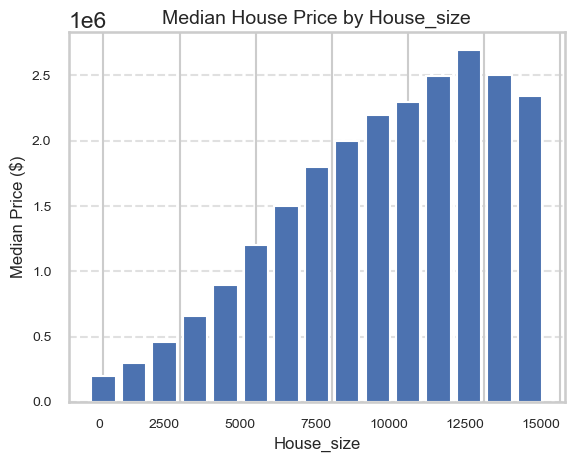

In [19]:
Bins=range(0,15001,1000)

plt.bar(range(5,15001,1000),df[columns].groupby([pd.cut(df['house_size'], bins=Bins,right=False)]).median()['price'],width=800)
plt.xlabel("House_size", fontsize=12)
plt.ylabel("Median Price ($)", fontsize=12)
plt.title("Median House Price by House_size", fontsize=14)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Median prices increase as interior size grows, especially moving from small to mid‑sized homes.


### Median House Price by Acre_lot

C:\Users\mingyue_jiang\AppData\Local\Temp\ipykernel_36880\2399247518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar(range(5,1001,100),df[columns].groupby([pd.cut(df['acre_lot'], bins=Bins,right=False)]).median()['price'],width=80, color='orange')


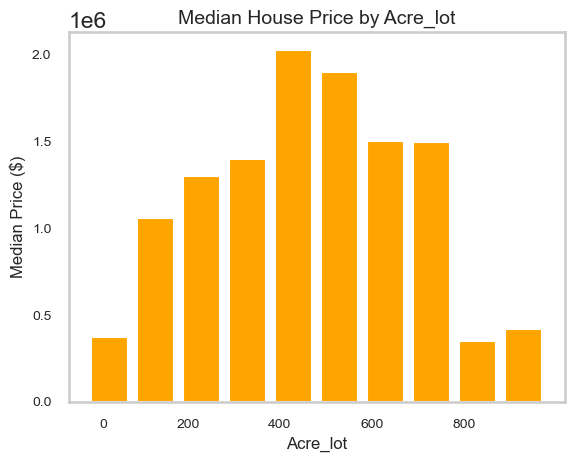

In [20]:
Bins=range(0,1001,100)

plt.bar(range(5,1001,100),df[columns].groupby([pd.cut(df['acre_lot'], bins=Bins,right=False)]).median()['price'],width=80, color='orange')
plt.title("Median House Price by Acre_lot", fontsize=14)
plt.xlabel("Acre_lot", fontsize=12)
plt.ylabel("Median Price ($)", fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.grid()
plt.show()

#### Lot size has a weaker and less consistent relationship with price.
#### Very large lots are rare and sometimes associated with outliers (e.g., rural or special‑use properties).

### Average House Size by state

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

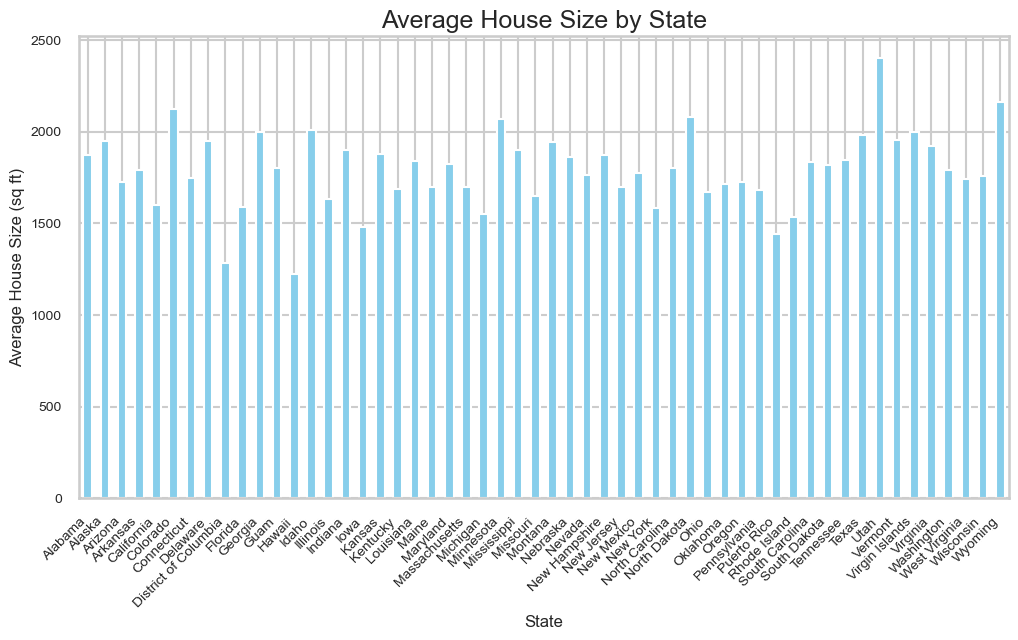

In [21]:
avg_size_state = df.groupby('state')['house_size'].median()

plt.figure(figsize=(12, 6))
ax = avg_size_state.plot(kind='bar', color='skyblue', title="Average House Size by State",fontsize=14)
ax.set_ylabel("Average House Size (sq ft)",fontsize=12)
ax.set_xlabel("State",fontsize=12)
plt.xticks(rotation=45,ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)

### Number of Listings by State

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0, 0.0, '0'),
  Text(0, 25000.0, '25000'),
  Text(0, 50000.0, '50000'),
  Text(0, 75000.0, '75000'),
  Text(0, 100000.0, '100000'),
  Text(0, 125000.0, '125000'),
  Text(0, 150000.0, '150000'),
  Text(0, 175000.0, '175000'),
  Text(0, 200000.0, '200000')])

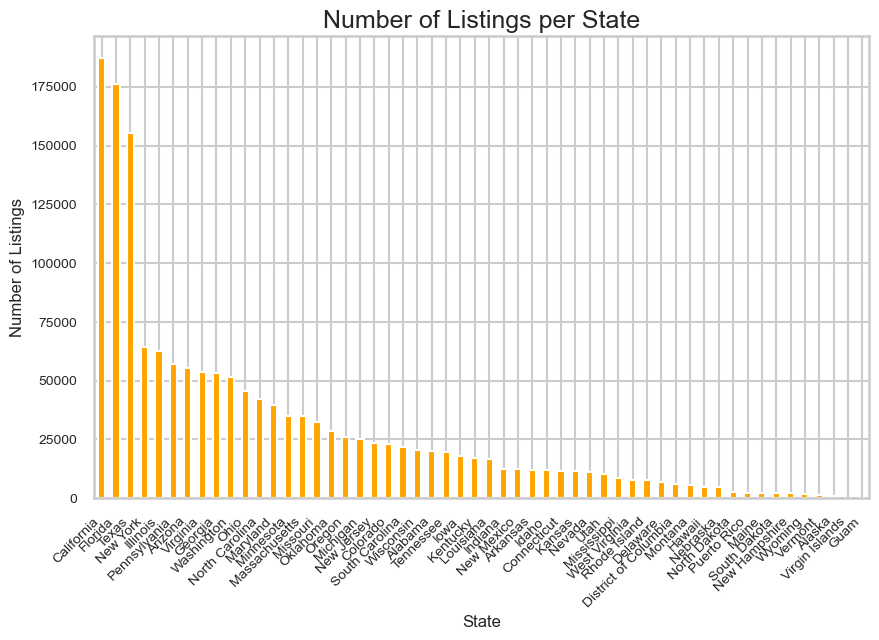

In [22]:
# counting the house listings by state
count_state = df['state'].value_counts() 

plt.figure(figsize=(10, 6))
ax = count_state.plot(kind='bar', color='orange', title="Number of Listings per State",fontsize=14)
ax.set_ylabel("Number of Listings",fontsize=12)
ax.set_xlabel("State",fontsize=12)
plt.xticks(rotation=45,ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)

### Correlation analysis of housing prices with different features

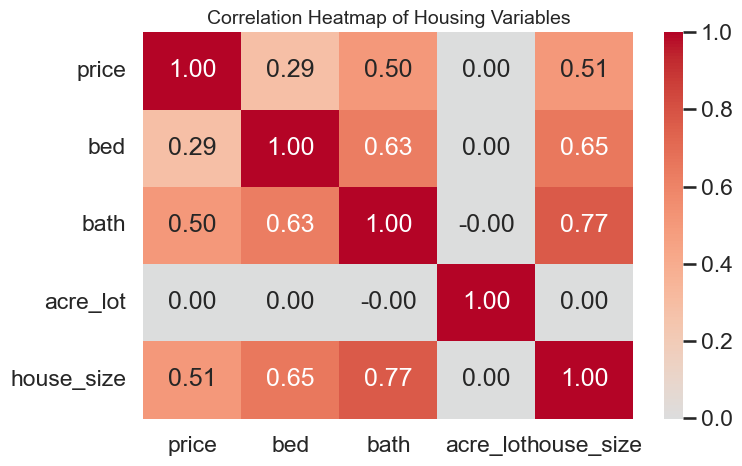

In [23]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            center=0)         

plt.title('Correlation Heatmap of Housing Variables', fontsize=14)
plt.tight_layout()
plt.show()


#### Interior space and functionality (house size, bathrooms, bedrooms) are key drivers of price.
#### Geographic location introduces large differences in baseline price levels.
#### Lot size is less consistently related to price once other features are considered.


### Median House Price (USD) per State

In [24]:
!pip install folium geopandas
import folium

In [25]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Wyoming', 'Maine', 'Georgia', 'Pennsylvania',
       'West Virginia', 'Delaware', 'Ohio', 'California', 'Maryland',
       'Virginia', 'Colorado', 'District of Columbia', 'Wisconsin',
       'North Carolina', 'Kentucky', 'South Carolina', 'Tennessee',
       'Mississippi', 'Alabama', 'Florida', 'Texas', 'Missouri',
       'Arkansas', 'Louisiana', 'Indiana', 'Illinois', 'Michigan', 'Iowa',
       'Minnesota', 'South Dakota', 'Nebraska', 'North Dakota', 'Montana',
       'Idaho', 'Kansas', 'Oklahoma', 'New Mexico', 'Utah', 'Nevada',
       'Washington', 'Oregon', 'Arizona', 'Hawaii', 'Guam', 'Alaska'],
      dtype=object)

In [26]:
import folium

# Map state names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY','District of Columbia': 'DC','Puerto Rico': 'PR',
    'Virgin Islands': 'VI','Guam': 'GU', 'New Brunswick': 'NB'
}

# Add abbreviation column
df['state_abbrev'] = df['state'].map(us_state_abbrev)

# Compute median price per state
median_price = df.groupby('state_abbrev')['price'].median().reset_index()

# Setup a folium map centered on the US
map = folium.Map(location=[37.8, -96], zoom_start=4)

# Choropleth maps bind Pandas DataFrames and GeoJSON geometries
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    data=median_price,
    columns=['state_abbrev', 'price'],
    key_on='feature.id',  # Check your GeoJSON structure
    fill_color='RdYlGn',  # ColorBrewer palette
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name='Median House Price (USD) per State'
).add_to(map)

# Add layer control
folium.LayerControl().add_to(map)

# Display map
map

#### State names were mapped to standard postal abbreviations (e.g., California → CA).
#### Median price per state was joined to a U.S. states GeoJSON and rendered on a map.
#### High‑price regions (e.g., West Coast, Northeast urban areas, D.C., Hawaii) are visually prominent.

### Number of Listings per State

In [27]:
# Map state names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY','District of Columbia': 'DC','Puerto Rico': 'PR',
    'Virgin Islands': 'VI','Guam': 'GU', 'New Brunswick': 'NB'
}

# Add abbreviation column
df['state_abbrev'] = df['state'].map(us_state_abbrev)

# count_state = df['state'].value_counts() 
count_state = df['state_abbrev'].value_counts().reset_index()
count_state.columns = ['state_abbrev', 'count']

# Setup a folium map centered on the US
map11 = folium.Map(location=[37.8, -96], zoom_start=4)

# Choropleth maps bind Pandas DataFrames and GeoJSON geometries
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    data=count_state,
    columns=['state_abbrev', 'count'],
    key_on='feature.id',  # Check your GeoJSON structure
    fill_color='RdYlGn',  # ColorBrewer palette
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name='Number of Listings per State'
).add_to(map11)

# Add layer control
folium.LayerControl().add_to(map11)

# Display map
map11

#### State‑level listing counts were computed, mapped to abbreviations, and visualized.
#### Highlights the concentration of listings in high‑population states.

### Lasso Regression

In [28]:
# Convert categorical columns to numeric (one-hot encoding) 
categorical_cols = ['status', 'state'] 
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  


In [29]:
# Define X and y
X = df.drop(['price','state_abbrev'], axis=1)
y= np.log1p(df['price'])
X.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'status_sold', 'state_Alaska',
       'state_Arizona', 'state_Arkansas', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Delaware', 'state_District of Columbia',
       'state_Florida', 'state_Georgia', 'state_Guam', 'state_Hawaii',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Kansas', 'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_Nevada',
       'state_New Hampshire', 'state_New Jersey', 'state_New Mexico',
       'state_New York', 'state_North Carolina', 'state_North Dakota',
       'state_Ohio', 'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Puerto Rico', 'state_Rhode Island', 'state_South Carolina',
       'state_South Dakota', 'state_Tennessee', 'state_Texas', 'sta

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, max_iter=10000).fit(X_train_scaled, y_train)
print("Best alpha:", lasso_cv.alpha_) 

Best alpha: 0.00043127119763156275


In [32]:
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=100000).fit(X_train_scaled, y_train) 

In [33]:
# Print coefficients and intercept
print("lasso.coef_:", lasso.coef_)
print("lasso.intercept_:", lasso.intercept_)

# Print training and test scores
print("Training set Score:", lasso.score(X_train_scaled, y_train))
print("Test set Score:", lasso.score(X_test_scaled, y_test))

lasso.coef_: [-0.08087523  0.25424996 -0.00193471  0.28945332 -0.03702577  0.00666754
  0.09258078 -0.00994376  0.33855361  0.06793279  0.02683682  0.01373628
  0.06266946  0.13269485  0.01320681  0.00546564  0.0651922   0.05367226
 -0.00337235 -0.01344864 -0.01248832 -0.02398287 -0.01271732 -0.01116608
  0.00822658  0.03921991  0.11239588 -0.01531838  0.02170701 -0.01777659
 -0.01728139  0.033687   -0.00553061  0.05064975  0.01441449  0.04359982
  0.01493593  0.09241783  0.02783393 -0.00505727 -0.05182458 -0.01918021
  0.08240883  0.00174833 -0.00563831  0.03162824  0.01780737  0.0045211
  0.0215221   0.05208303  0.04529733  0.0057541   0.00438144  0.05241757
  0.14203923 -0.02163768  0.00469797  0.00849243]
lasso.intercept_: 12.82702935659111
Training set Score: 0.5452490232708114
Test set Score: 0.5461495358982433


In [34]:
#Create a Series mapping coefficients to feature names
coefficients = pd.Series(lasso.coef_, index=X.columns)


                       Feature  Importance
43          state_Pennsylvania    0.001748
2                     acre_lot    0.001935
18              state_Illinois    0.003372
52        state_Virgin Islands    0.004381
47          state_South Dakota    0.004521
56             state_Wisconsin    0.004698
39          state_North Dakota    0.005057
15                  state_Guam    0.005466
32              state_Nebraska    0.005531
44           state_Puerto Rico    0.005638
51               state_Vermont    0.005754
5                 state_Alaska    0.006668
24                 state_Maine    0.008227
57               state_Wyoming    0.008492
7               state_Arkansas    0.009944
23             state_Louisiana    0.011166
20                  state_Iowa    0.012488
22              state_Kentucky    0.012717
14               state_Georgia    0.013207
19               state_Indiana    0.013449
11              state_Delaware    0.013736
34         state_New Hampshire    0.014414
36         

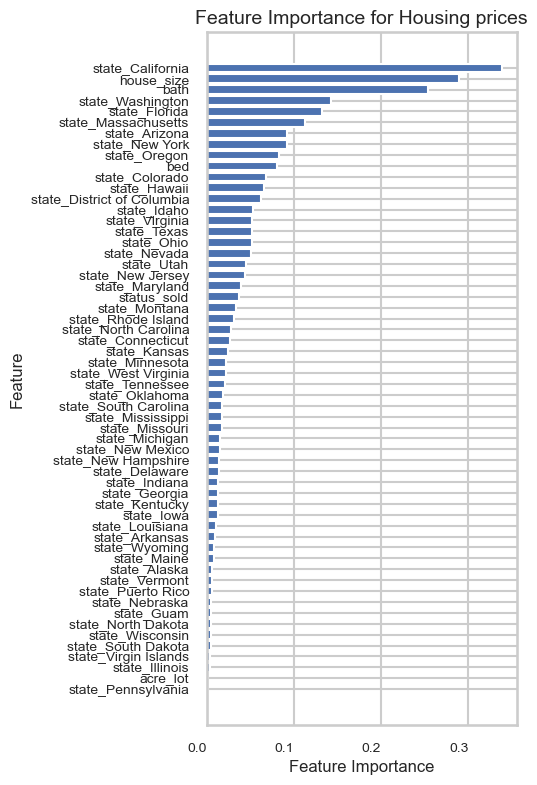

In [35]:
importance_df = pd.DataFrame({'Feature': X.columns,'Importance': abs(lasso.coef_)}).sort_values(by='Importance', ascending=True)
print(importance_df) 

# Plot in ascending order
plt.figure(figsize=(4,9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance",fontsize=12)
plt.ylabel("Feature",fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.title("Feature Importance for Housing prices",fontsize=14)
plt.show() 

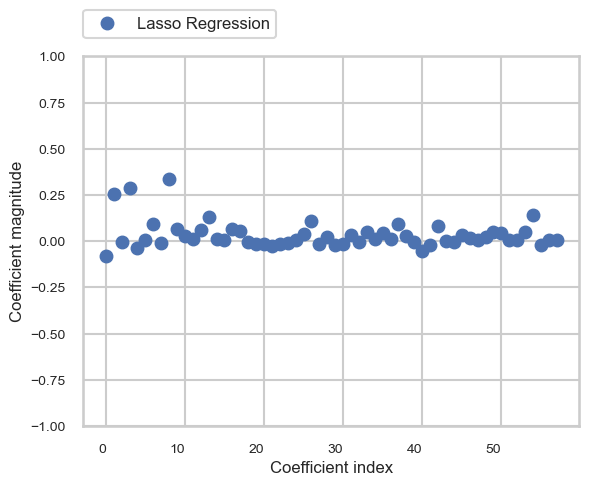

In [36]:
plt.plot(lasso.coef_, 'o', label="Lasso Regression")
plt.legend(ncol=2, loc=(0, 1.05),fontsize=12)
plt.ylim(-1, 1)
plt.xlabel("Coefficient index",fontsize=12)
plt.ylabel("Coefficient magnitude",fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.show()

#### The model explains roughly 55% of the variance in log‑prices on held‑out data.
#### Regularization helps control overfitting and highlight more influential predictors.

#### Feature importance (absolute coefficient values) shows:

Among continuous variables:
house_size and bath have the largest coefficients.
bed has a smaller but still meaningful effect.
acre_lot is relatively minor.

#### Among states:
California, Washington, Florida, Massachusetts, and New York have relatively large positive coefficients.
Some states/territories (e.g., Alaska, Guam, various interior states) have very small contributions.

### DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

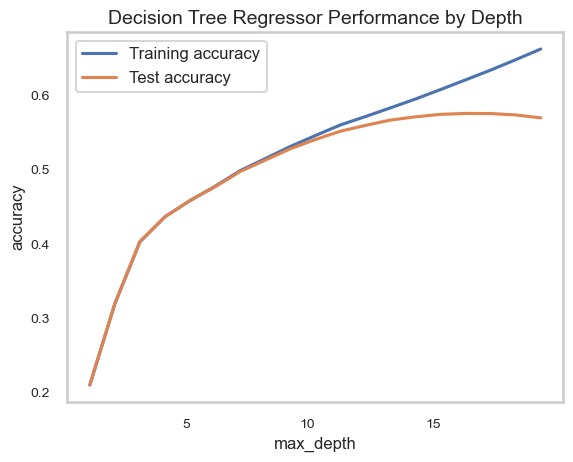

Optimal max_depth: 16


In [38]:
training_accuracy = []
test_accuracy = []


for m in range(1,20):
    tree = DecisionTreeRegressor(random_state=0,max_depth=m)
    tree.fit(X_train_scaled, y_train)
    training_accuracy.append(tree.score(X_train_scaled, y_train))
    test_accuracy.append(tree.score(X_test_scaled, y_test))
    
plt.plot(range(1,20), training_accuracy, label="Training accuracy")
plt.plot(range(1,20), test_accuracy, label="Test accuracy")
plt.xlabel('max_depth',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.title('Decision Tree Regressor Performance by Depth',fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.show()
optimal_depth = test_accuracy.index(max(test_accuracy)) + 1  
print("Optimal max_depth:", optimal_depth)

In [39]:
tree = DecisionTreeRegressor(random_state=0,max_depth=optimal_depth)
tree.fit(X_train_scaled, y_train)
print("Accuracy on training set:",round(tree.score(X_train_scaled, y_train),3))
print("Accuracy on test set:", round(tree.score(X_test_scaled, y_test),3))

Accuracy on training set: 0.621
Accuracy on test set: 0.576


                       Feature    Importance
34         state_New Hampshire  0.000000e+00
32              state_Nebraska  0.000000e+00
52        state_Virgin Islands  0.000000e+00
5                 state_Alaska  0.000000e+00
15                  state_Guam  0.000000e+00
51               state_Vermont  4.781858e-08
36            state_New Mexico  2.644585e-06
29           state_Mississippi  5.933370e-06
48             state_Tennessee  8.696238e-06
44           state_Puerto Rico  9.693874e-06
57               state_Wyoming  1.060647e-05
25              state_Maryland  1.116512e-05
7               state_Arkansas  1.290957e-05
47          state_South Dakota  1.332976e-05
56             state_Wisconsin  1.431973e-05
39          state_North Dakota  1.666503e-05
23             state_Louisiana  1.673297e-05
20                  state_Iowa  1.797308e-05
38        state_North Carolina  1.870734e-05
11              state_Delaware  2.368786e-05
24                 state_Maine  2.698954e-05
55        

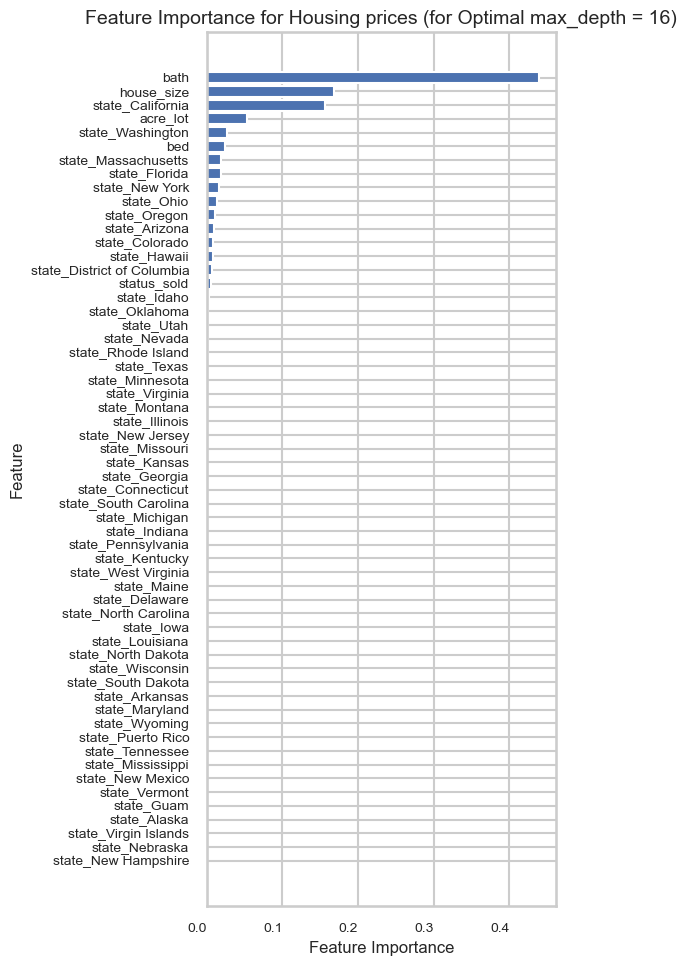

In [40]:
importance_df = pd.DataFrame({'Feature': X.columns,'Importance': tree.feature_importances_})  # Creating a DataFrame for feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)   # Sort in ascending order
print(importance_df) 

# Plot in ascending order
plt.figure(figsize=(6,10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance",fontsize=12)
plt.ylabel("Feature",fontsize=12)
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.title("Feature Importance for Housing prices (for Optimal max_depth = 16)",fontsize=14)
plt.tight_layout()
plt.show() 

#### To capture non‑linear relationships and interactions, a Decision Tree Regressor was trained:

A range of max_depth values from 1 to 19 was evaluated.
Accuracy ( R2  ) on train and test sets was plotted by depth.
Optimal tree depth:
max_depth = 16, where test performance peaked.

#### Final model performance:

Training R2≈0.621
Test R2≈0.576
This indicates the tree:

Fits the data better than the linear Lasso model on both train and test sets.
Captures important non‑linearities and interactions while keeping overfitting moderate (training and test scores are reasonably close).
Feature importance from the decision tree shows:

#### Top continuous predictors:

bath (largest importance, ≈ 44%).
house_size. acre_lot (more important here than in the linear model due to non‑linear split effects). bed. Top location predictors:

state_California, state_Washington, state_New York, state_Florida, state_Massachusetts stand out.
Some smaller states and territories have near‑zero importance.
The tree model confirms that:

Bathrooms and interior size are primary structural drivers.
Living in certain states, particularly coastal and high‑income regions, significantly elevates prices.

## Main Findings

#### Structural Characteristics Matter Most

Interior features—especially number of bathrooms and house size—are the strongest predictors.
Bedrooms contribute, but bathrooms appear more powerful once size is controlled.

#### Location Has a Strong but Heterogeneous Impact

State dummies demonstrate substantial differences across regions.
High‑cost markets like California, Washington, New York, Massachusetts, Florida, and D.C. push prices upward relative to the national baseline.

#### Lot Size Has Limited Influence

acre_lot shows only modest correlation with price.
In the Lasso model, its coefficient is small; in the decision tree it plays some role, likely in specialized segments (very large or very small plots).

#### Model Performance

Linear (Lasso) model: 
R2≈0.55

Decision tree model: R2≈0.58on test data.
Both models achieve moderate predictive accuracy, suitable for broad estimation but not precise appraisal at the individual property level.
Consistency Between EDA and Models

Relationships suggested by the visualizations (e.g., higher prices with more baths, larger size, and in specific states) are corroborated by both Lasso and tree feature importance.


## Limitations

#### Limited feature set:
Missing key variables like neighborhood quality, school ratings, crime levels, year built, renovation status, distance to city centers, and economic indicators.

#### No temporal dimension:
Listing time and broader market cycles (interest rates, year) were not included, which restricts the ability to model time‑dependent price movements.

#### Granularity of location:
Using state‑level dummies ignores intra‑state variation (e.g., San Francisco vs. rural California).

#### Data source bias:
Listings may not represent all transactions; certain price ranges or regions could be over‑ or under‑represented.



## Future Work
To improve predictive performance and deepen insights, future extensions could include:

Incorporating additional data:
Census demographics, income, school quality, unemployment rates, crime statistics, and distance to downtown areas.
Adding temporal features:
Year/month of listing, local price indices, interest rate levels.
Using more advanced models:
Random Forests, Gradient Boosting (XGBoost, LightGBM), or neural networks to capture complex interactions.
Finer geographic modeling:
ZIP code or county‑level fixed effects instead of just state dummies.
Model interpretability tools:
SHAP values or partial dependence plots to better explain non‑linear effects.


## Conclusion
This project demonstrates how predictive analytics can be applied at scale to understand the U.S. housing market. Using over 1.5 million cleaned listings, the analysis finds that:

Interior property characteristics (especially bathrooms and house size) and overall location are the dominant determinants of price.
Lot size is less influential, especially compared with interior space.
Predictive models (Lasso and Decision Tree) provide consistent evidence for these conclusions and achieve moderate accuracy, with the tree capturing additional non‑linear structure.